In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
import functools as ft
import random
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister,transpile,assemble
from qiskit.quantum_info import random_unitary, partial_trace, Statevector
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.circuit.library import UnitaryGate
from qiskit_algorithms import AmplificationProblem,Grover
from qiskit.primitives import Sampler
from qiskit.visualization import array_to_latex
from qiskit_aer import Aer
#from fable import fable
from fable.fable import fable
#sim = Aer.get_backend('aer_simulator',device='GPU')
from functions_QQ import *

# Generación de Estados Termales usando Computación Cuántica
### Tony Milla, Sebastián Páucar, César Pacheco, Daniel Castillo-Castro
### QuantumQuipu, proyecto 3

Referencias: 

Lin, [Lecture Notes on Quantum Algorithms for Scientific Computation](https://arxiv.org/abs/2201.08309)

Powers *et al.* [Exploring Finite Temperature Properties of Materials with Quantum Computers](https://arxiv.org/abs/2109.01619)
## Algoritmo Clásico
* Cálculo analítico usando matrices de los estados de Haar y de la energía de los estados termales. 

In [2]:
#constants
N = 4
d = 5
h = 1.0
jx = 0.5
jy = 1.25
jz = 2.0
H_heisenberg = transverse_field_heisenberg(N, h, jx, jy, jz)
energy_vector = []
for beta in np.arange(0.0, 1.6, 0.05):
    exp_value = 0.0
    for i in range(100):
        Q = expm(-beta*H_heisenberg/2.0)
        entropy, circ, state = quantum_haar_state(N, d)
        tpq  = np.matmul(Q, state)
        exp_value += (np.inner(tpq.conj().T, np.matmul(H_heisenberg, tpq))/np.inner(tpq.conj().T, tpq)).real
    exp_value /= 100
    energy_vector.append(exp_value)
#array_to_latex(energy_vector)

## Inicialización de Estados de Haar
* Testeando para cadenas de 9 espines 1D y 2D
* Comparación de entropía para ambos casos. Mejoras respecto a número de repeticiones.

/home/dacc/Escritorio/Proyectos/QQuipu3/functions_QQ.py:55: RuntimeWarning: divide by zero encountered in log
  for j in range(2**n1d): hstate+=-(probs[j]*np.log(probs[j]))
/home/dacc/Escritorio/Proyectos/QQuipu3/functions_QQ.py:55: RuntimeWarning: invalid value encountered in double_scalars
  for j in range(2**n1d): hstate+=-(probs[j]*np.log(probs[j]))
/home/dacc/Escritorio/Proyectos/QQuipu3/functions_QQ.py:68: RuntimeWarning: divide by zero encountered in log
  for j in range(2**(x2d*y2d)): hstate+=-(probs[j]*np.log(probs[j]))
/home/dacc/Escritorio/Proyectos/QQuipu3/functions_QQ.py:68: RuntimeWarning: invalid value encountered in double_scalars
  for j in range(2**(x2d*y2d)): hstate+=-(probs[j]*np.log(probs[j]))


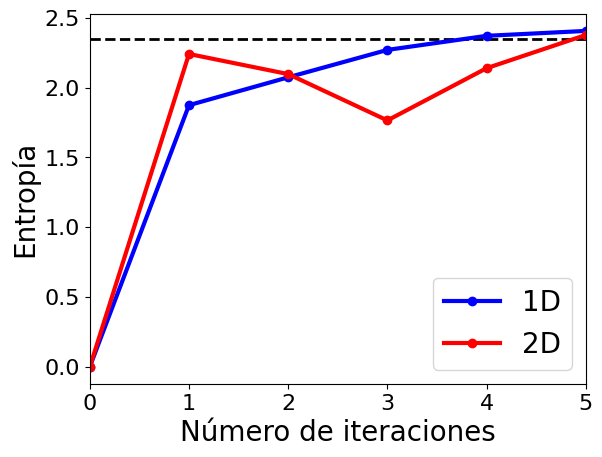

In [3]:
nre=5;num1d=4; hchain1= haar_1d(nre,num1d)
nx2d=2; ny2d=2; hchain2=haar_2d(nre,nx2d,ny2d)
hhaar=np.log(2**num1d)-1+0.577
xchain=np.arange(0,nre+1,1)
tresc=np.empty(nre+1); tresc.fill(hhaar)
plt.plot(xchain,tresc, '--', color='black',linewidth=2)
plt.plot(xchain,hchain1, '-o', color='blue',linewidth=3, label ="1D")
plt.plot(xchain,hchain2, '-o', color='red',linewidth=3, label="2D")
plt.xlabel('Número de iteraciones',fontsize=20)
plt.ylabel('Entropía',fontsize=20)
plt.xticks(fontsize=16);plt.yticks(fontsize=16)
plt.legend(loc='lower right', fontsize=20)
plt.xlim([0,nre]);#ylim([0,4])

## Circuito del hamiltoniano

## Codificación de bloques y amplificación de amplitud 
* Toma: Número de dimensiones, número de repeticiones, temperatura inversa
* Entrega: Vector resultante del circuito
## Cálculo de energía para estado térmico
* Composición de evolución hamiltoniana
* Cálculo de intervalos de estados entre $\beta=[0,1.6]$

In [ ]:
Ener=[]

for beta in np.arange(0.0, 1.6, 0.05):
    exp_value = 0.0
    for i in range(10):
        Q = expm(-beta*H_heisenberg/2.0)
        estate = block_encoding_amplification(N,d,H_heisenberg,beta)['statevector']
        tpq  = np.matmul(Q, state.data[0:2**N])
        exp_value += (np.inner(tpq.conj().T, np.matmul(H_heisenberg, tpq))/np.inner(tpq.conj().T, tpq)).real
    exp_value /= 10
    Ener.append(exp_value)


#for j in range (32):
#  beta = (1.6*j)/32
#  state= block_encoding_amplification(N,d,H_heisenberg,beta)['statevector']
#  Ener.append(np.matmul(dag(state.data[0:2**N]),np.matmul(H_heisenberg,state.data[0:2**N])).real)
#print(Ener)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(np.arange(0.0, 1.6, 0.05), energy_vector, color='blue')
ax.plot(np.arange(0.0, 1.6, 0.05), energy_vector, label='Classical method', color='blue')
#ax.scatter(np.linspace(0.0, 1.6, 32), np.array(Ener), color='red')
#ax.plot(np.linspace(0.0, 1.6, 32), np.array(Ener), label='Quantum method', color='red')
ax.scatter(np.arange(0.0, 1.6, 0.05), Ener, color='red')
ax.plot(np.arange(0.0, 1.6, 0.05), Ener, label='Quantum method', color='red')
# Add labels and legend
ax.set_xlabel('Inverse Temperature')
ax.set_ylabel('Energy')
ax.legend()
plt.grid()
plt.show()